In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from helpers import load_titanic
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# change the font
plt.rcParams["font.family"] = "serif"

In [3]:
# load the titanic data
train, test = load_titanic()

## Plot number of survivors by gender

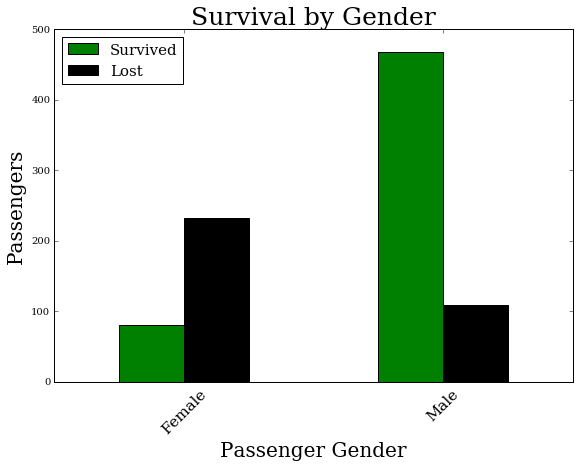

In [4]:
# cross tabulate gender and survival
ctab = pd.crosstab(train.Sex, train.Survived)

# open a figure and axis
fig = plt.figure(figsize=(9, 7))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

# plot the bar chart
ctab.plot.bar(ax=ax, color=['g', 'k'], legend=None)

# adjust labels
ax.set_title('Survival by Gender', size=25)
ax.set_xlabel('Passenger Gender', size=20)
ax.set_xticklabels(('Female', 'Male'), size=15, rotation=45)
ax.set_ylabel('Passengers', size=20)

# create legend
h, labels = ax.get_legend_handles_labels()
labels = 'Survived', 'Lost'
ax.legend(h, labels, loc=2, fontsize=15)

# save the figure
fig_name = '../visualizations/gender_survival.png'
fig.savefig(fig_name)

## Plot probability of survival by gender

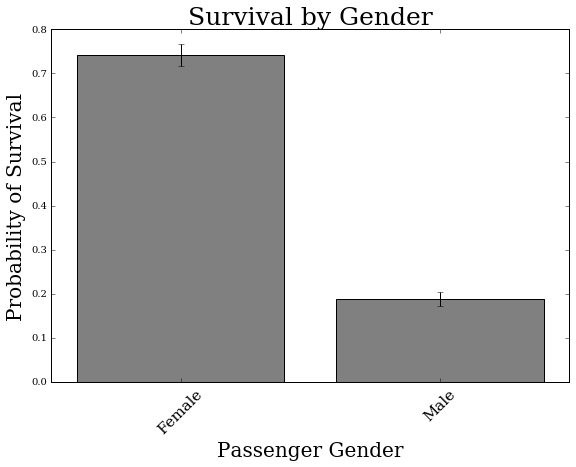

In [5]:
# compute number of each gender
n = ctab.sum(1).values

# compute probability by gender
prob = ctab.div(n, axis=0)
p = prob.values[:, 1]

# compute standard deviation
err = np.sqrt(p*(1-p)/n)

# open a figure and axis
fig = plt.figure(figsize=(9, 7))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

# plot the probabilities
x = (0, 1)
ax.bar(x, p, yerr=err, ecolor='k', edgecolor='k', facecolor='grey')

ax.set_xticks((0.4, 1.4))
ax.set_xlim((-0.1, 1.9))

# adjust labels
ax.set_title('Survival by Gender', size=25)
ax.set_xlabel('Passenger Gender', size=20)
ax.set_xticklabels(('Female', 'Male'), size=15, rotation=45)
ax.set_ylabel('Probability of Survival', size=20)

# save the figure
fig_name = '../visualizations/gender_probability.png'
fig.savefig(fig_name)